In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv('loan_applications_train.csv') # Reading the data set into a dataframe using pandas

In [2]:
df.head(10) # Print the first ten rows and columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.describe() # Display summary of the numerical varibales within the data set

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

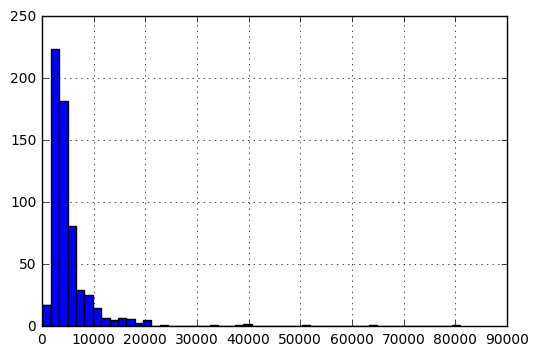

In [5]:
df['ApplicantIncome'].hist(bins=50)

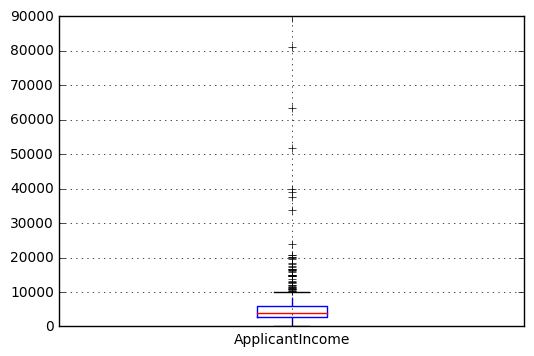

In [6]:
df.boxplot(column='ApplicantIncome')

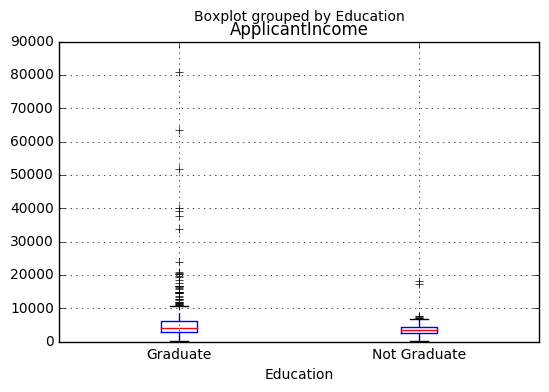

In [7]:
df.boxplot(column='ApplicantIncome', by ='Education')

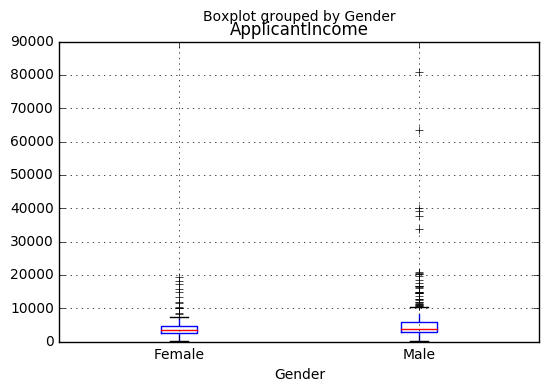

In [8]:
df.boxplot(column='ApplicantIncome', by ='Gender')

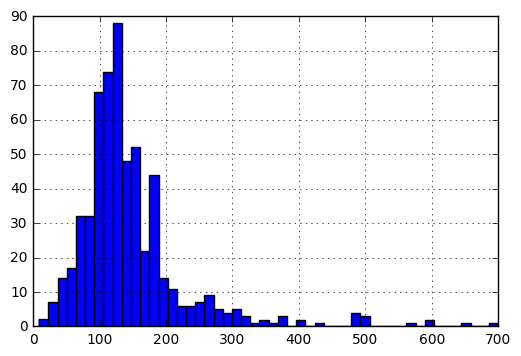

In [9]:
df['LoanAmount'].hist(bins=50)

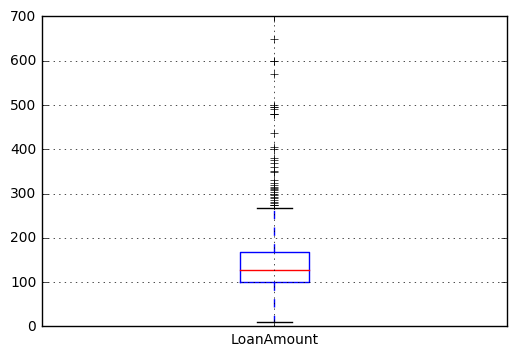

In [10]:
df.boxplot(column="LoanAmount")

In [11]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp3 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).sum())
print('Frequency Table for Credit History:')
print(temp1)

print('\nNumber of Approved Loans for each Credit History Class:')
print(temp3)

print('\nProbility of getting loan for each Credit History Class:') 
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Number of Approved Loans for each Credit History Class:
Credit_History
0.0      7
1.0    378
Name: Loan_Status, dtype: int64

Probility of getting loan for each Credit History Class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


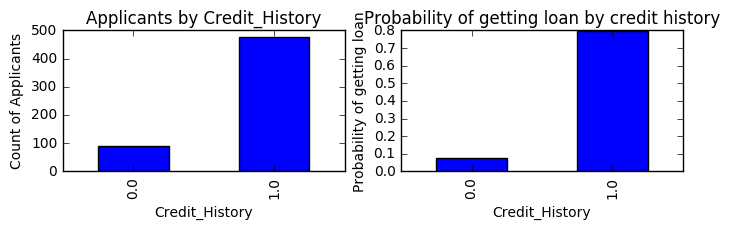

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,4))

ax1 = fig.add_subplot(221)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(222)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
temp2.plot(kind ='bar')

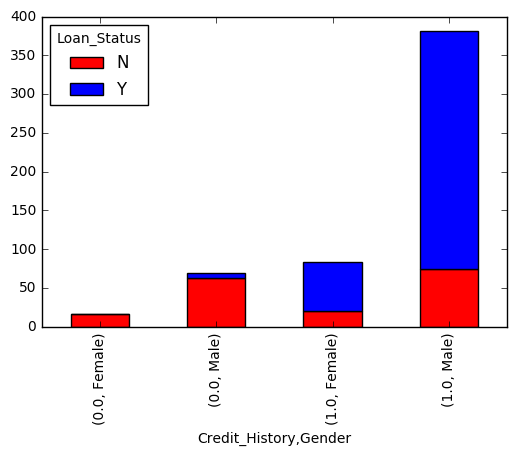

In [13]:
temp3 = pd.crosstab((df['Credit_History'], df['Gender']), df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [14]:
df.apply(lambda x: sum(x.isnull()),axis=0) # Number of Missing Values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(fage,inplace=True)

In [16]:
df['Self_Employed'].fillna('No', inplace=True)

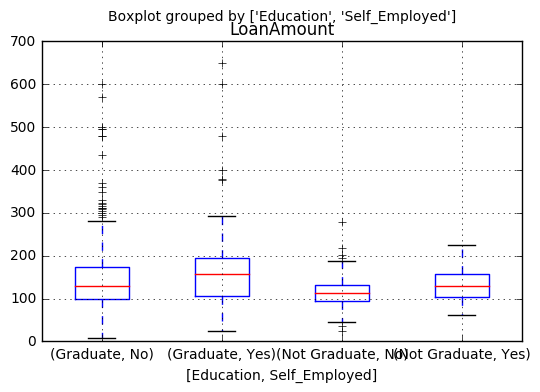

In [21]:
df.boxplot(column='LoanAmount', by=(['Education','Self_Employed']))

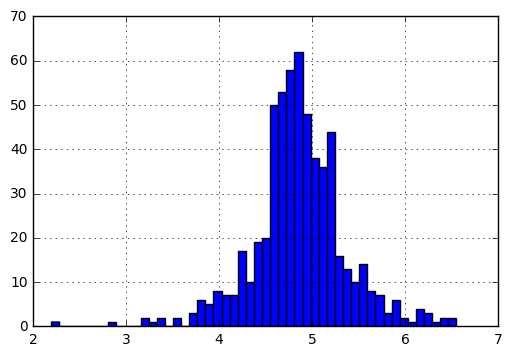

In [22]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=50)

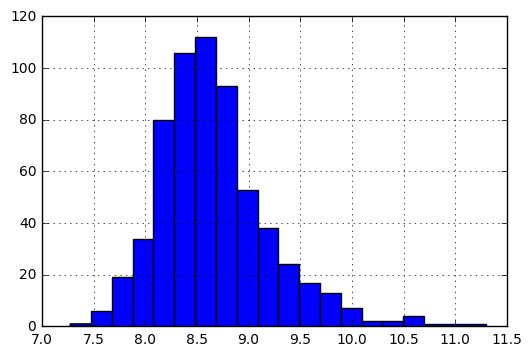

In [23]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [33]:
data_columns = ['Gender','Married','Dependents','Loan_Amount_Term','Credit_History']
for column in data_columns:
    df[column].fillna(df[column].mean, inplace=True)

In [41]:
#Import models from scikit learn module:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))


model = DecisionTreeClassifier()
outcome_var = 'Loan_Status'
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)


ValueError: could not convert string to float: 'Graduate'